## Ejercicio de Pandas que Incluye:
 - Limpieza de datos , Filtrado y Visualizacion con Pandas Matplotlib

In [1]:
# Supongamos que tienes un conjunto de datos sobre el rendimiento de estudiantes y deseas
# Limpieza de datos , filtrar la informacion y visualizar algunos graficos

#Cargar y explorar datos
import pandas as pd
#Cargar el conjunto de datos (Simulado del caso)

data = {
    'Nombre':['Juan','Maria','Carlos','Ana','Luis','Elena'],
    'Edad':[22,21,None,23,24,22],
    'Nota1':[75,85,90,78,None,95],
    'Nota2':[82,88,92,79,85,None]
}
df = pd.DataFrame(data)
df

,Nombre,Edad,Nota1,Nota2
0,Juan,22.0,75.0,82.0
1,Maria,21.0,85.0,88.0
2,Carlos,NaN,90.0,92.0
3,Ana,23.0,78.0,79.0
4,Luis,24.0,NaN,85.0
5,Elena,22.0,95.0,NaN


In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  6 non-null      object 
 1   Edad    5 non-null      float64
 2   Nota1   5 non-null      float64
 3   Nota2   5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 324.0+ bytes


In [7]:
#Limpieza de datos
df['Edad'].fillna(df['Edad'].mean(),inplace=True)
df['Nota1'].fillna(df['Nota1'].mean(),inplace=True)
df['Nota2'].fillna(df['Nota2'].mean(),inplace=True)
df

,Nombre,Edad,Nota1,Nota2
0,Juan,22.0,75.0,82.0
1,Maria,21.0,85.0,88.0
2,Carlos,22.4,90.0,92.0
3,Ana,23.0,78.0,79.0
4,Luis,24.0,84.6,85.0
5,Elena,22.0,95.0,85.2


In [14]:
#Asegurar tipos de datos correctos
df['Edad'] = df['Edad'].astype(int)
df['Nota1'] = df['Nota1'].astype(int)
df['Nota2'] = df['Nota2'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  6 non-null      object
 1   Edad    6 non-null      int32 
 2   Nota1   6 non-null      int32 
 3   Nota2   6 non-null      int32 
dtypes: int32(3), object(1)
memory usage: 252.0+ bytes


In [15]:
df

,Nombre,Edad,Nota1,Nota2
0,Juan,22,75,82
1,Maria,21,85,88
2,Carlos,22,90,92
3,Ana,23,78,79
4,Luis,24,84,85
5,Elena,22,95,85


In [17]:
#Filtrado de datos
df_filtrado_edad=df[df['Edad']>21]
df_filtrado_notas=df[(df['Nota1']>80) & (df['Nota2']>80)]
df_filtrado_notas


,Nombre,Edad,Nota1,Nota2
1,Maria,21,85,88
2,Carlos,22,90,92
4,Luis,24,84,85
5,Elena,22,95,85


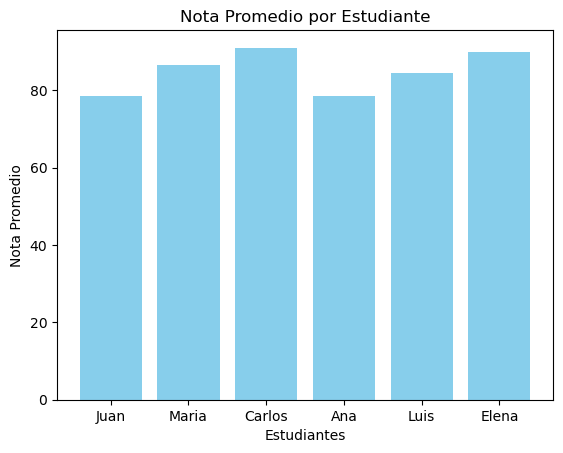

In [21]:
#Visualizacion de Graficos
import matplotlib.pyplot as plt
#Grafico de Barras para notas promedio por estudiante
df['NotaPromedio'] = df[['Nota1','Nota2']].mean(axis=1)
plt.bar(df['Nombre'],df['NotaPromedio'],color='skyblue')
plt.xlabel('Estudiantes')
plt.ylabel('Nota Promedio')
plt.title('Nota Promedio por Estudiante')
plt.show()

## Ejemplo de Machine Learning
- Supongamos que trabajamos con un conjunto de datos que representa las ventas de una tienda en funcion de dos caracteristicas: "Publicidad" y "Horas de Trabajo"

In [25]:
import pandas as pd
import numpy as np
#train_test_split  es un funcion en la biblioteca scikit-learn que se utiliza para dividir 
#un conjunto de datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split 
#LinearRegression es una clase en la biblioteca de sklearn que implementa un modelo de regresion
#Lineal .-es un metodo estadistico que se utiliza para modelar la relacion lineal entre una
#Variable dependiente(objetivo) y una variables independientes(caracteristicas)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
data = pd.DataFrame({
    'Publicidad': [50, 30, 60, np.nan, 80, 20, 50, 70, 90, 30],
    'Horas_de_trabajo': [5, 3, 8, 4, 10, np.nan, 5, 7, 9, 3],
    'Ventas': [200, 120, 220, 150, 300, 100, 180, 250, 320, np.nan]
})

data

,Publicidad,Horas_de_trabajo,Ventas
0,50.0,5.0,200.0
1,30.0,3.0,120.0
2,60.0,8.0,220.0
3,NaN,4.0,150.0
4,80.0,10.0,300.0
5,20.0,NaN,100.0
6,50.0,5.0,180.0
7,70.0,7.0,250.0
8,90.0,9.0,320.0
9,30.0,3.0,NaN


In [46]:
data_cleaned=data.dropna()
data_cleaned

,Publicidad,Horas_de_trabajo,Ventas
0,50.0,5.0,200.0
1,30.0,3.0,120.0
2,60.0,8.0,220.0
4,80.0,10.0,300.0
6,50.0,5.0,180.0
7,70.0,7.0,250.0
8,90.0,9.0,320.0


In [58]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data_cleaned[['Publicidad', 'Horas_de_trabajo']] #entrenamiento
y = data_cleaned['Ventas'] #prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [59]:
#Crear entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [60]:
#Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
print(mse)

150.00000000000034


In [61]:
#Visualizar predicciones
predictions_df = pd.DataFrame({
    'Ventas_Real': y_test, #y_test conjunto de datos de prueba
    'Ventas_Predichas': predictions
})

predictions_df

,Ventas_Real,Ventas_Predichas
0,200.0,180.0
1,120.0,110.0
7,250.0,250.0
2,220.0,230.0
